<a href="https://colab.research.google.com/github/SumitBadheka/Machine_learning/blob/master/ML_001_Classification_01_Decision_Tree_Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Algorithm 001 -Classification 01 - Decision Tree

Decison Tree are simple to implement and are useful in creating a model using Qualitative variables. Decision Trees are very easy to explain and can easily handle qualitative predictors without the need to create dummy variables.

### First things first is to get the data in Colab
Abalone Data uploaded from Local Drive - The data source obtained from UCI machine learning data set. The above code will give you file browsere window to select the file

In [0]:
from google.colab import files
uploaded = files.upload()

Saving abalone.csv to abalone (1).csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "abalone.csv" with length 191962 bytes


In [0]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['abalone.csv'].decode('utf-8')))
print(df)

     Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
0      M   0.455     0.365  ...          0.1010        0.1500     15
1      M   0.350     0.265  ...          0.0485        0.0700      7
2      F   0.530     0.420  ...          0.1415        0.2100      9
3      M   0.440     0.365  ...          0.1140        0.1550     10
4      I   0.330     0.255  ...          0.0395        0.0550      7
...   ..     ...       ...  ...             ...           ...    ...
4172   F   0.565     0.450  ...          0.2390        0.2490     11
4173   M   0.590     0.440  ...          0.2145        0.2605     10
4174   M   0.600     0.475  ...          0.2875        0.3080      9
4175   F   0.625     0.485  ...          0.2610        0.2960     10
4176   M   0.710     0.555  ...          0.3765        0.4950     12

[4177 rows x 9 columns]


Lets understand the data well ... 

What is abalone ? refer the wiki here:- [Abalone-Wiki](https://en.wikipedia.org/wiki/Abalone)

Key points for the lazy ones :- 
Abalones are marine snails.Abalones can be found along coasts of almost every continent. Usually, abalones are consumed as food all around the world, by different cultures. However, the bright and variety of colors of the interior side of their shells makes then an valuable object of adornment and decoration. By the way adding 1.5 in the rings gives the age in years.


### Problem Statement :- Abalone Age Prediction
Description- Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

so in a nutshell, The original stated problem is estimate the age an abalone, which can be determined from the number of rings in their shell. However, counting the number of rings in an abalone shell is an expensive method. Thus, one possible solution is predict the number of rings of an abalone from characteristics like height, diameter, lenght and weight measurements.

In [0]:
  df.info()
  df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


We understad from the above :- 
1. There are total 4177 observations 
2. Sex is the only variable which is categorical 
3. There are no missing values 
4. Seems there are some invalid values, such as Height - min value is Zero, Viscera weight is also has min value as very low (Zero)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d8f3a7ef0>,
      dtype=object)

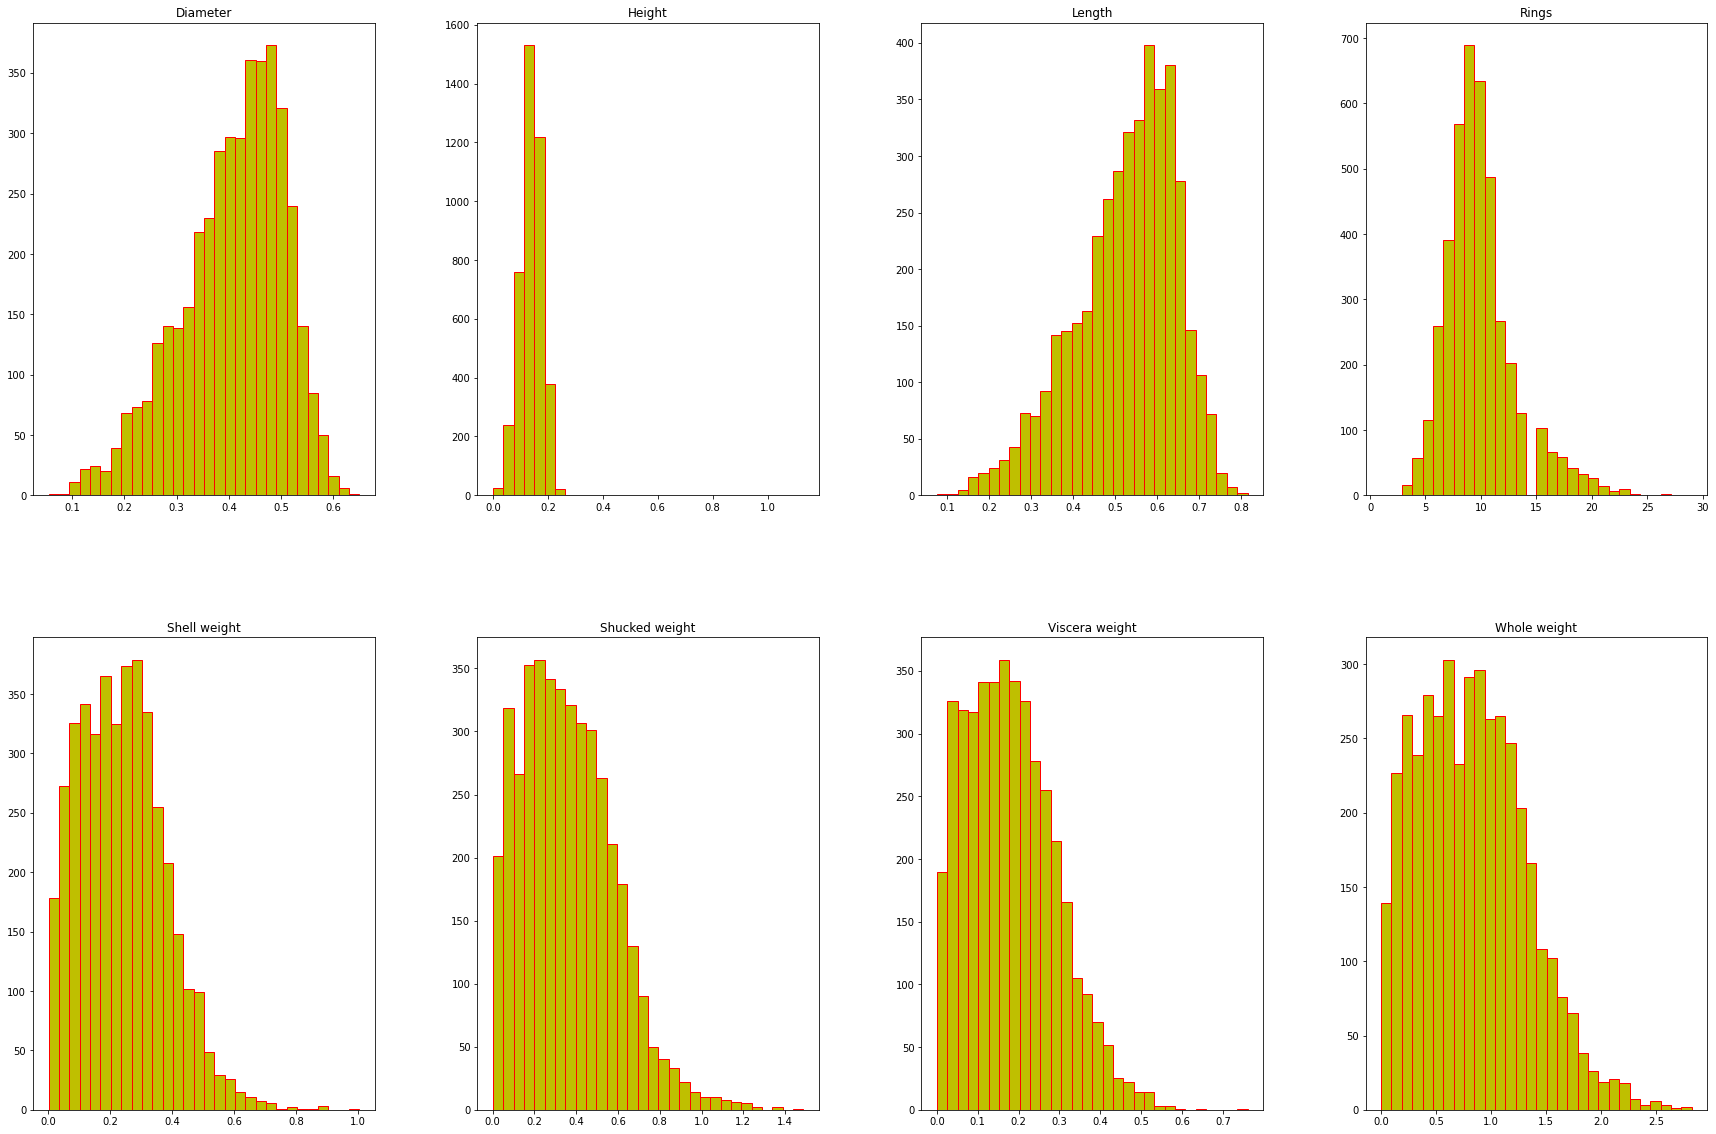

In [0]:
df.hist(figsize=(30,20), grid=False, layout=(2, 4), bins = 30,color='y', edgecolor='red',linewidth=1) 

From the above histograms we see some sort of skewness, but we need a numerical value to assess the skewness in each of these variables. so lets find out Skewness. 

In [0]:
df.skew(axis = 0, skipna = True) 

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64